# 2. Exploratory Data Analysis (EDA)

## Data Visualization

In [22]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import plotly.express as px

## Importing of Dataset

In [2]:
dataset = pd.read_csv('CleanedLifeExpectancy.csv')
dataset.head()

country  year      status  life_expectancy  adult_mortality  \
0          Afghanistan  2015  Developing             65.0            263.0   
1              Albania  2015  Developing             77.8             74.0   
2              Algeria  2015  Developing             75.6             19.0   
3               Angola  2015  Developing             52.4            335.0   
4  Antigua and Barbuda  2015  Developing             76.4             13.0   

   infant_deaths   alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0      62.000000  0.010000               71.279624         65.0     1154  ...   
1      35.129032  4.600000              364.975229         99.0        0  ...   
2      21.000000  5.288333                0.000000         95.0       63  ...   
3      66.000000  5.288333                0.000000         64.0      118  ...   
4      35.129032  5.288333                0.000000         99.0        0  ...   

   polio  total_expenditure  diphtheria  hiv/aids           gdp    population  \
0    6.0               8.16        65.0       0.1    584.259210  3.373649e+07   
1   99.0               6.00        99.0       0.1   3954.227830  2.887300e+04   
2   95.0               7.08        95.0       0.1   4132.762920  3.987153e+07   
3    7.0               7.08        64.0       1.9   3695.793748  2.785935e+06   
4   86.0               7.08        99.0       0.2  13566.954100  1.109741e+07   

   thinness_10-19_years  thinness_5-9_years  income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                   1.2                 1.3                            0.762   
2                   6.0                 5.8                            0.743   
3                   8.3                 8.2                            0.531   
4                   3.3                 3.3                            0.784   

   schooling  
0       10.1  
1       14.2  
2       14.4  
3       11.4  
4       13.9  

[5 rows x 21 columns]

In [3]:
print("Data type : ", type(dataset))
print("Data dims : ", dataset.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2808, 21)


In [4]:
print(dataset.dtypes)

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                      float64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
under-five_deaths                  float64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_10-19_years               float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object


## Focus on Life Expectancy

In [8]:
lifeExpectancy = pd.DataFrame(dataset['life_expectancy'])
lifeExpectancy.describe()

life_expectancy
count      2808.000000
mean         69.450093
std           9.486230
min          36.300000
25%          63.475000
50%          72.200000
75%          75.900000
max          89.000000

<AxesSubplot:>

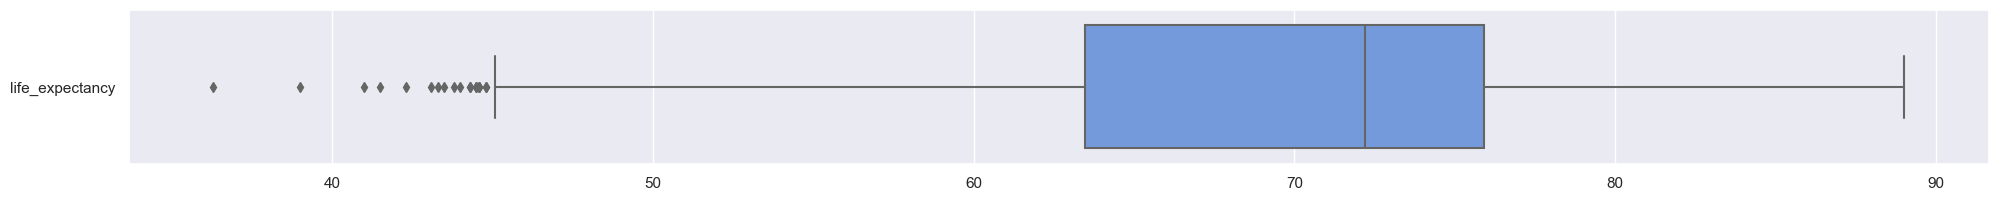

In [10]:
f = plt.figure(figsize=(24, 2))
sb.boxplot(data=lifeExpectancy, orient = "h", color = "cornflowerblue")

The box plot & discription shows:

The median is at 72.2.
Lowest Life Expectancy is 36.
Highest Life Expectancy is 89.

95.4% of countries have a life expectancy between 54 and 89.

14 data points are considered extreme outliers in the box plot.

<AxesSubplot:ylabel='Count'>

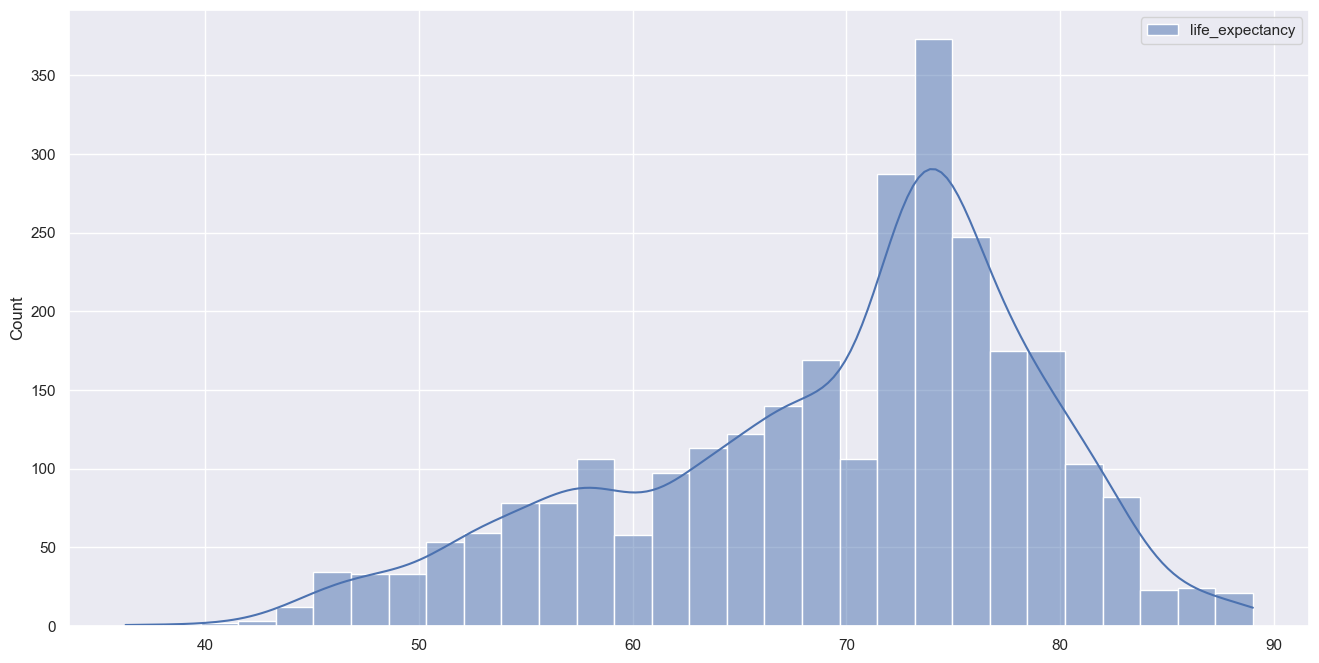

In [11]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = lifeExpectancy, kde = True)

The histogram shows:

The graph as a left skewed (Negatively skewed) distribution, the majority of the data points are clustered on the right side of the distribution, while the tail of the distribution extends towards the left.

Life expectancy of 72 years has the most amount of countries.

<AxesSubplot:>

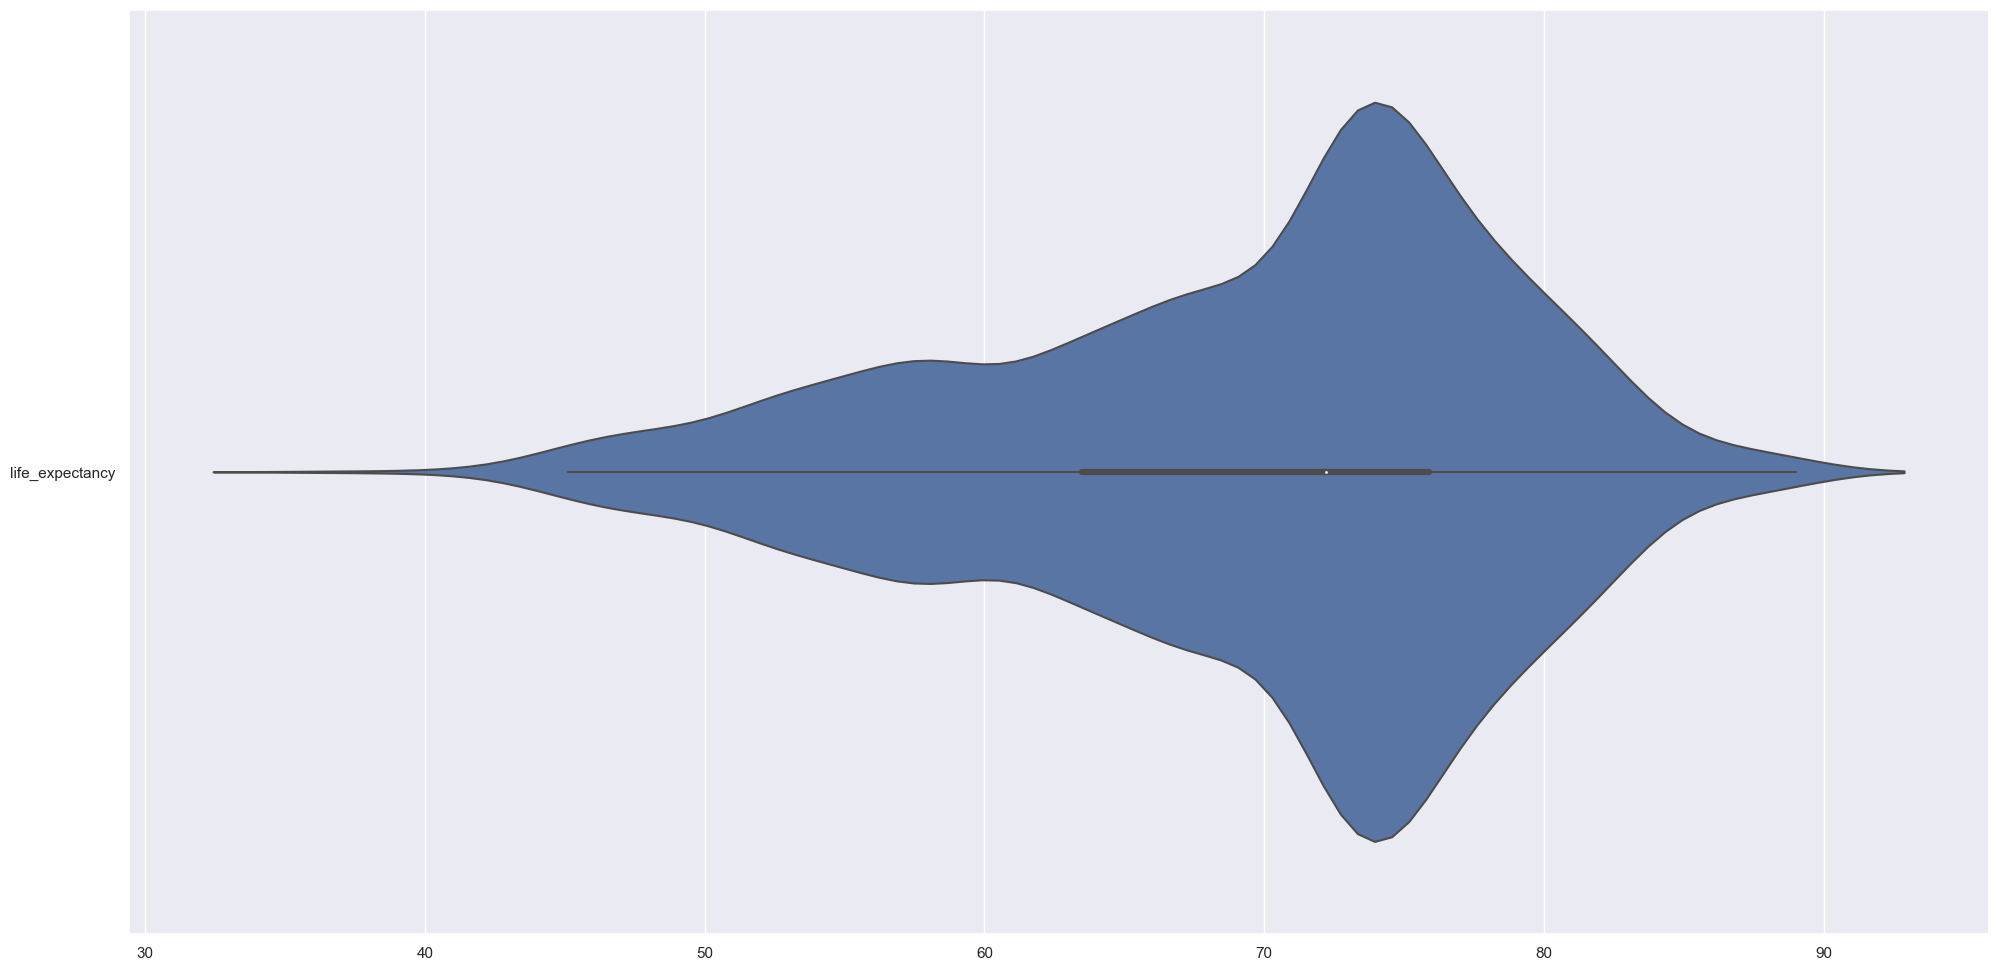

In [12]:
f = plt.figure(figsize=(24, 12))
sb.violinplot(data=lifeExpectancy, orient='h')

The violin plot doesn't show anything new that the other 2 have not.
But it shows both in a pleasent to see, easily comparable manner.

## Corrolation matrix and Heatmap of ALL variables

In [13]:
dataset.corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.155619        -0.077258   
life_expectancy                  0.155619         1.000000        -0.716656   
adult_mortality                 -0.077258        -0.716656         1.000000   
infant_deaths                   -0.037966        -0.128234         0.045717   
alcohol                         -0.047699         0.398467        -0.186481   
percentage_expenditure           0.018139         0.382769        -0.239640   
hepatitis_b                      0.232699         0.298232        -0.195632   
measles                         -0.077626        -0.142794         0.063333   
under-five_deaths               -0.046288        -0.157036         0.066052   
polio                            0.080662         0.463076        -0.285495   
total_expenditure                0.127349         0.209544        -0.109795   
diphtheria                       0.115851         0.478326        -0.295527   
hiv/aids                        -0.150311        -0.564042         0.556155   
gdp                              0.096902         0.437210        -0.279379   
population                       0.014596        -0.020239        -0.010339   
thinness_10-19_years            -0.042736        -0.478614         0.313195   
thinness_5-9_years              -0.048089        -0.474726         0.317230   
income_composition_of_resources  0.151915         0.849697        -0.555992   
schooling                        0.175761         0.739789        -0.446600   

                                 infant_deaths   alcohol  \
year                                 -0.037966 -0.047699   
life_expectancy                      -0.128234  0.398467   
adult_mortality                       0.045717 -0.186481   
infant_deaths                         1.000000 -0.079040   
alcohol                              -0.079040  1.000000   
percentage_expenditure               -0.046831  0.336271   
hepatitis_b                          -0.200641  0.082609   
measles                               0.479428 -0.086099   
under-five_deaths                     0.995960 -0.084771   
polio                                -0.129115  0.220562   
total_expenditure                    -0.108360  0.304815   
diphtheria                           -0.138408  0.219481   
hiv/aids                             -0.011707 -0.055343   
gdp                                  -0.063058  0.316767   
population                            0.542093 -0.037810   
thinness_10-19_years                  0.435636 -0.426447   
thinness_5-9_years                    0.441747 -0.414776   
income_composition_of_resources      -0.133029  0.504906   
schooling                            -0.150398  0.530893   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.018139     0.232699   
life_expectancy                                0.382769     0.298232   
adult_mortality                               -0.239640    -0.195632   
infant_deaths                                 -0.046831    -0.200641   
alcohol                                        0.336271     0.082609   
percentage_expenditure                         1.000000    -0.007715   
hepatitis_b                                   -0.007715     1.000000   
measles                                       -0.060563    -0.145593   
under-five_deaths                             -0.049952    -0.214082   
polio                                          0.147834     0.466473   
total_expenditure                              0.161936     0.097284   
diphtheria                                     0.143120     0.570761   
hiv/aids                                      -0.099474    -0.125363   
gdp                                            0.887268     0.054701   
population                                    -0.025952    -0.080120   
thinness_10-19_years                          -0.255348    -0.169614   
thinness_5-9_years             

<AxesSubplot:>

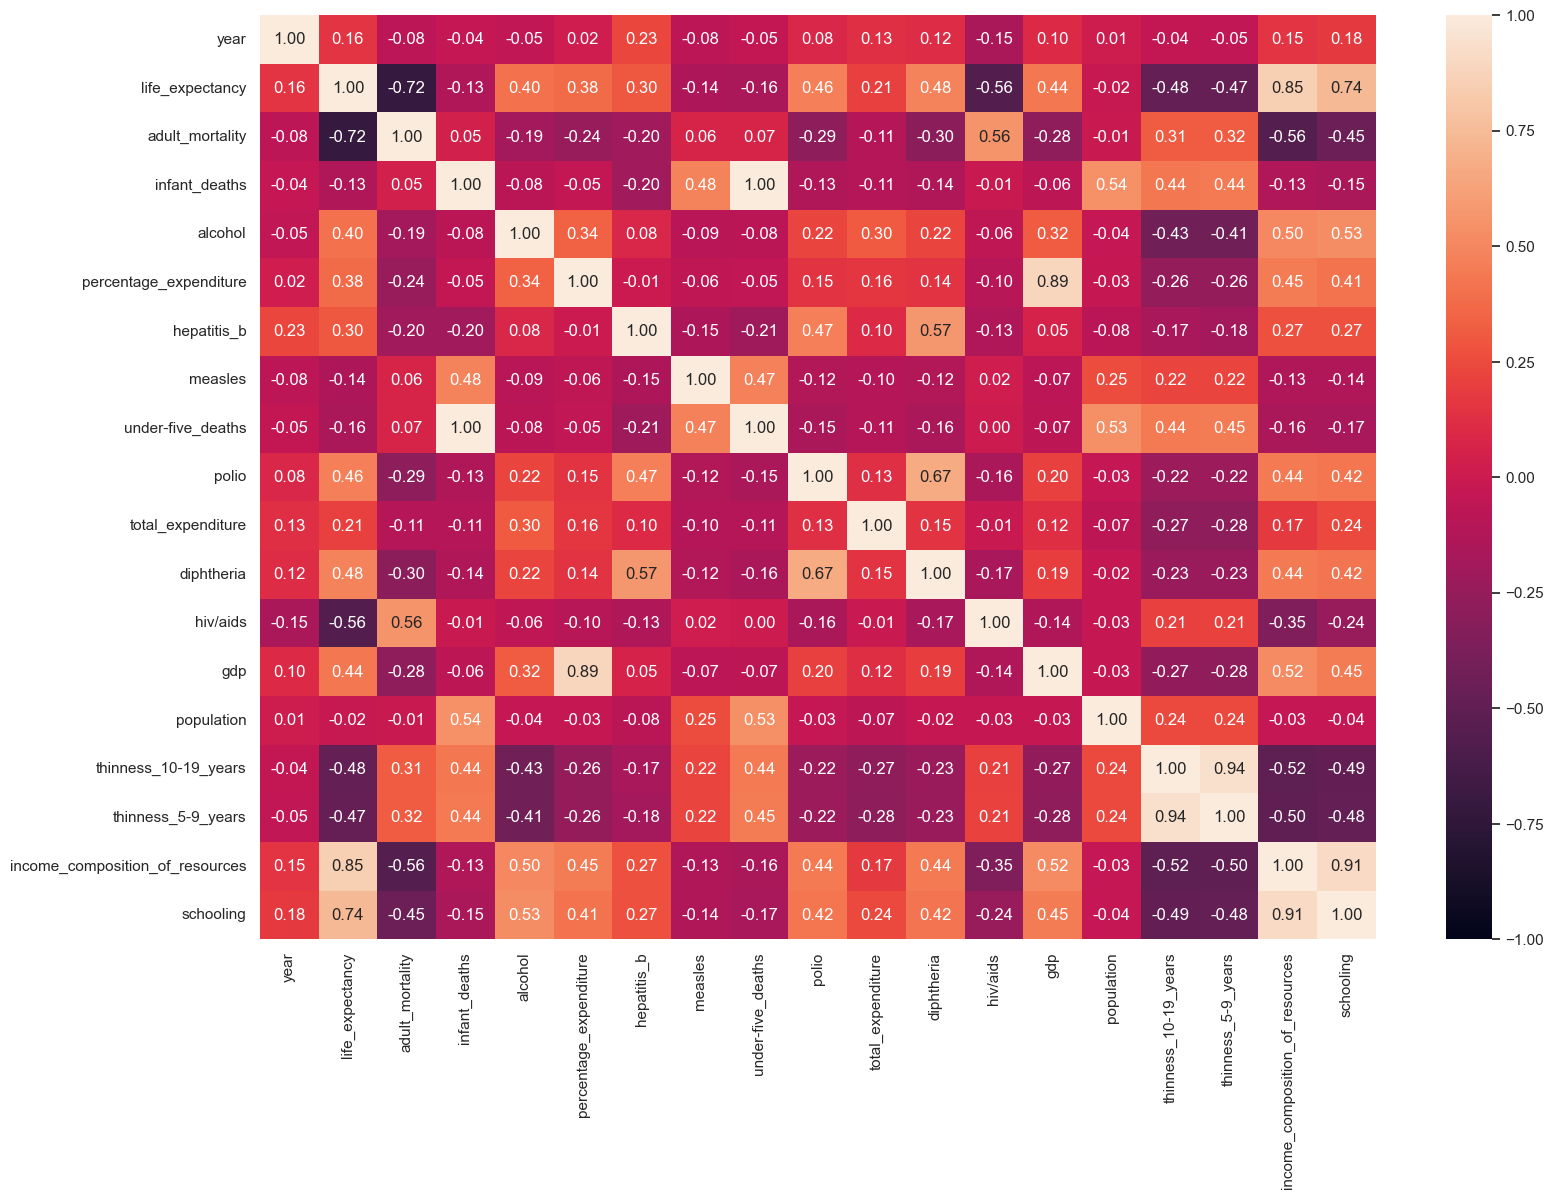

In [14]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(18, 12))
sb.heatmap(dataset.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Heat map analysis:

When trying to find corrolation with "life_expectancy",
"gdp", "diphtheria", "polio" ,"income_composition_of_resources", "schooling" are above 0.40.

Therefore they have a good corrolation among the other variables.

In [18]:
set1 = pd.DataFrame(dataset[["life_expectancy", "gdp", "diphtheria", "polio" ,"income_composition_of_resources", "schooling"]])

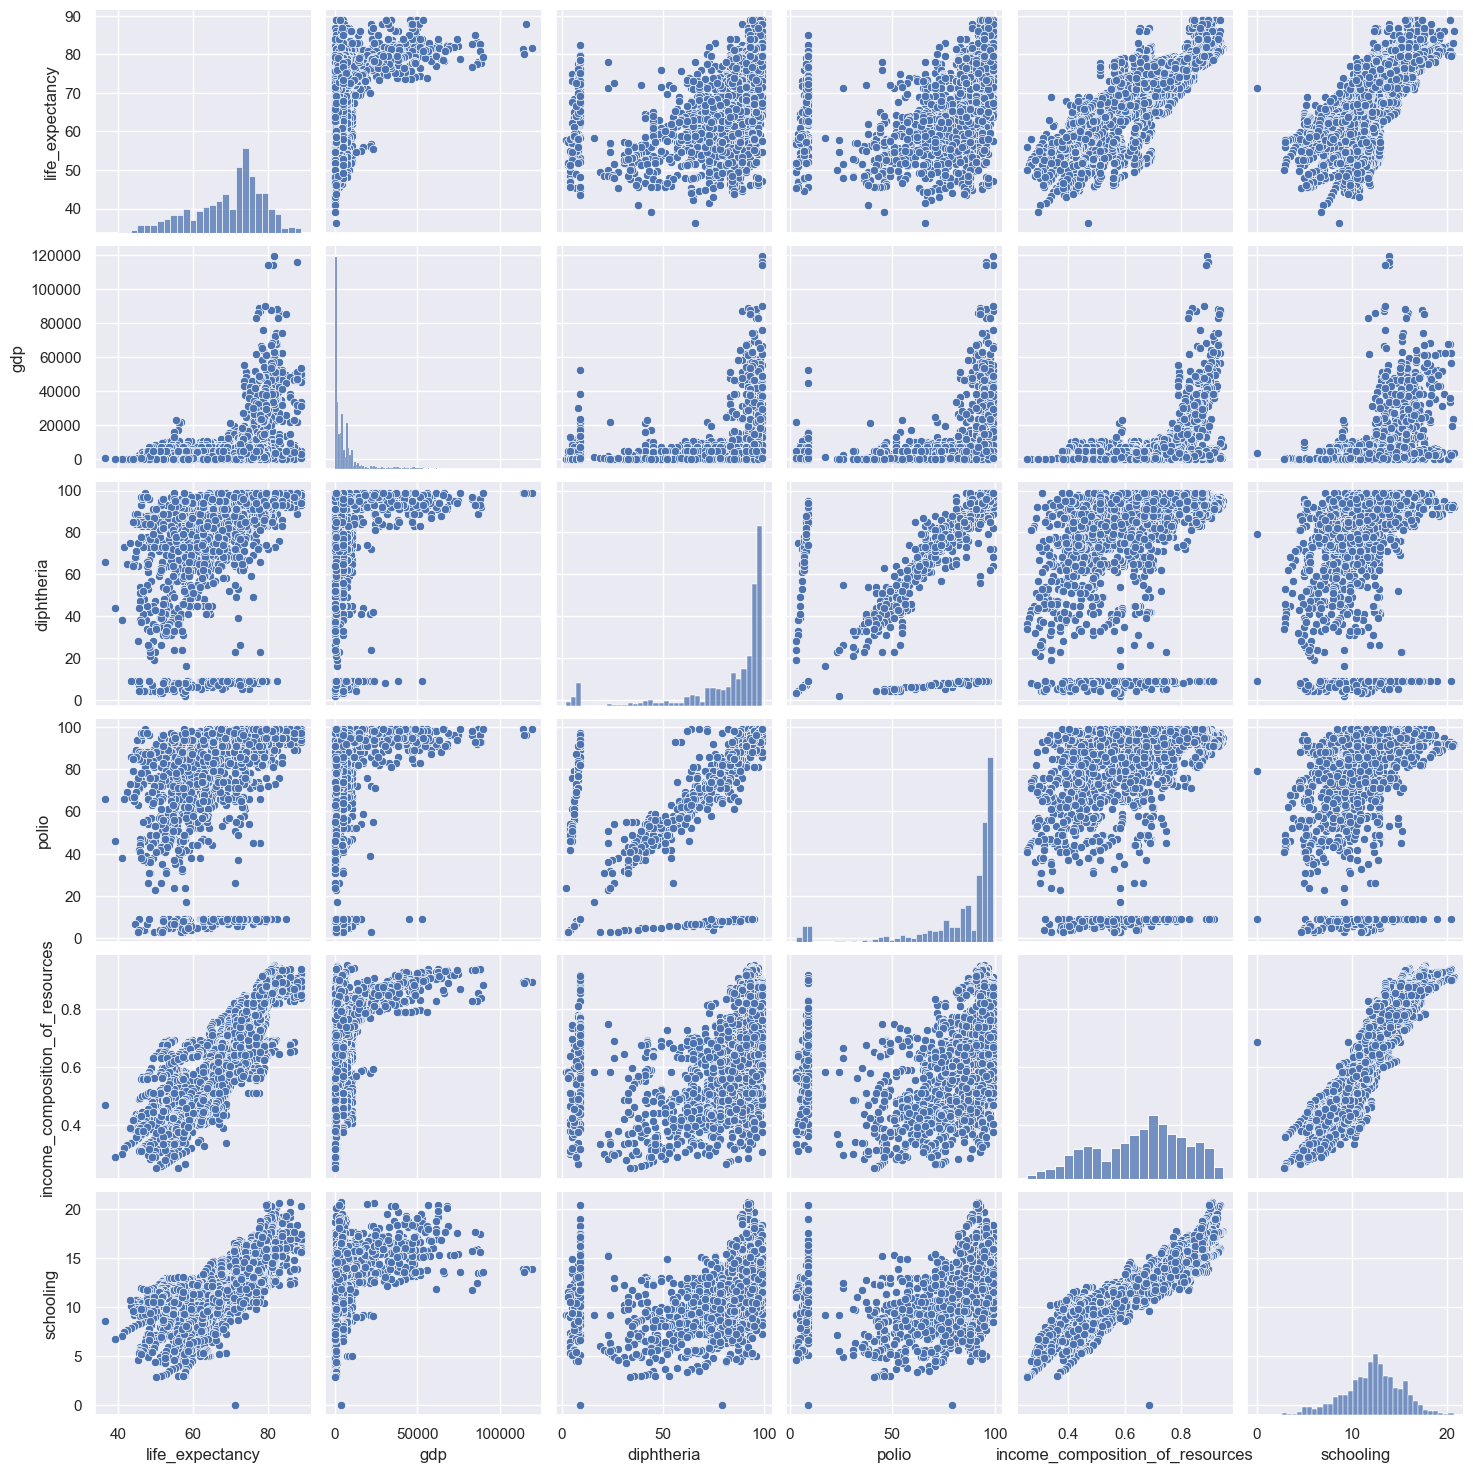

In [19]:
# Draw pairs of variables against one another
sb.pairplot(data = set1)

In [23]:
fig=px.violin(dataset,x='status',y='life_expectancy',color='status',template='plotly_white',box=True,title='Life expectancy Based on Countries status')
fig.show()

Exclusion:

Polio and diphtheria is out because of perculiar lower clustering (looks like a shelf) for both.

Schooling looks too normal.



Inclusion:

Development could be used and it is interesting due to the differing violin plots for Developing and Developed countries.

Gdp and Income_composition_of_resources could be use due to the interesting shape of bot


Hence, we choose to use gdp, income_composition_of_resources and Development